In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
df = pd.read_csv("NY-Housing-SimpleData.csv")
df.head()

,PROPERTYSQFT,PRICE
0,1400.0,315000
1,17545.0,195000000
2,2015.0,260000
3,445.0,69000
4,14175.0,55000000


In [3]:
df.columns = ["propertysqft","price"]

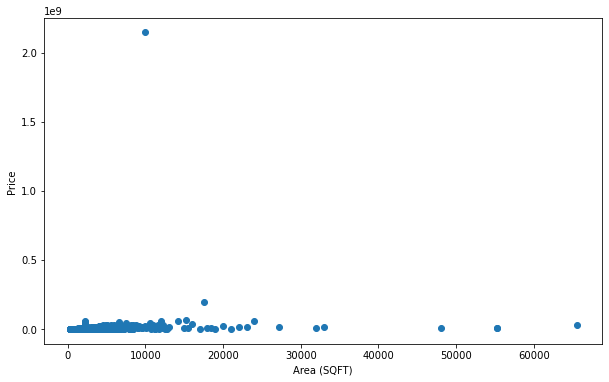

In [4]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df['propertysqft'], df['price'])
plt.xlabel("Area (SQFT)")
plt.ylabel("Price")
plt.show()

In [5]:
df[(df["price"]>150000000) | (df["propertysqft"]>30000)]

,propertysqft,price
1,17545.0,195000000
7,33000.0,16800000
304,10000.0,2147483647
823,48000.0,7200000
2146,55300.0,5827000
2148,55300.0,5827000
3130,32000.0,6950000
4623,65535.0,31500000


In [6]:
df.drop([1,7,304,823,2146,2148,3130,4623], axis=0, inplace=True)
df

,propertysqft,price
0,1400.000000,315000
2,2015.000000,260000
3,445.000000,69000
4,14175.000000,55000000
5,4004.000000,690000
...,...,...
4796,2184.207862,599000
4797,2184.207862,245000
4798,2184.207862,1275000
4799,655.000000,598125


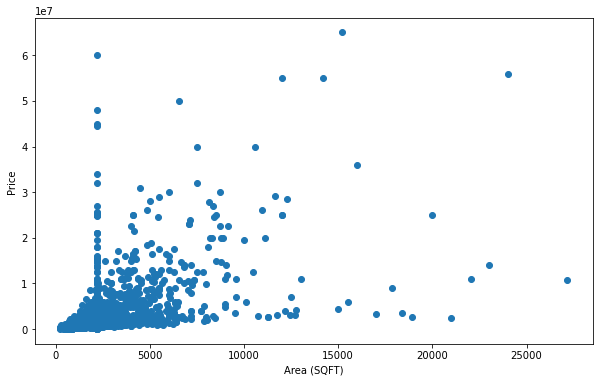

In [7]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df['propertysqft'], df['price'])
plt.xlabel("Area (SQFT)")
plt.ylabel("Price")
plt.show()

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df[["propertysqft"]], df["price"], test_size=0.2)
# scaler = MinMaxScaler()
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [10]:
preds = lr.predict(x_test)

In [11]:
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, preds)))
print("Coefficient of Determination/R-squared: ", r2_score(y_test, preds))

Root Mean Squared Error:  3317929.935954419
Coefficient of Determination/R-squared:  0.12940276753427282


In [12]:
lr.coef_

array([1318.36546986])

In [13]:
lr.intercept_


-906356.4776616623

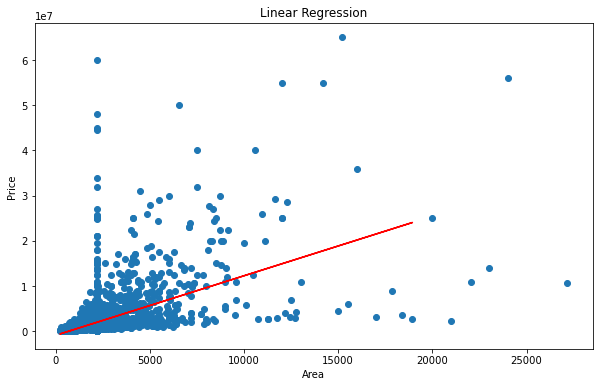

In [14]:
x = df["propertysqft"]
y = df["price"]
plt.figure(figsize=(10, 6)) 
plt.scatter(df['propertysqft'], df['price'])
plt.plot(x_test, preds, color='red')
# Add labels and title
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression')

# Show the plot
plt.show()